# **Latar Belakang**
Airbnb adalah sebuah marketplace online yang menghubungkan orang-orang yang ingin menyewa atau menyewakan propertinya, seperti kamar pribadi, apartemen, villa, atau rumah. Airbnb didirikan pada tahun 2008 di San Francisco, California, Amerika Serikat. Sebagai salah satu platform online terbesar di dunia, analisis data dari jutaan penginapan di platform ini menbjadi faktor penting bagi perusahaan. Hasil analisis data ini dapat digunakan untuk berbagai tujuan, seperti pengambilan keputusan bisnis, pemasaran, dan inovasi layanan.

Departement *Host and Guest Services* di Airbnb bertanggung jawab untuk memastikan pengalaman positif bagi *host* dan *guest*. Salah satu tantangan yang mereka hadapi adalah mengidentifikasi kriteria yang mempengaruhi *guest* untuk memilih listing di Bangkok. 

Kriteria tersebut akan digunakan Departement *Host and Guest Services* sebagai materi pendukung dalam merumuskan panduan bermanfaat yang dapat digunakan para *host* untuk meningkatkan performa listing mereka.


# **Pernyataan Masalah**
Apa saja kriteria yang mempengaruhi *guest* untuk memilih listing di Bangkok? dan bagaimana Departement *Host and Guest Services* dapat menggunakan hasil analisis ini untuk membantu *host* untuk meningkatkan performa listing mereka?

# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisis data airbnb listing untuk kota Bangkok yang dimiliki oleh perusahaan.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy import stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal

import warnings
warnings.filterwarnings("ignore")

## **Penjelasan Kolom Data**
Dataset ini berisi berbagai informasi. Terdapat 16 kolom di dalam dataset Airbnb Listings Bangkok, yaitu:

* id: ID unik untuk tiap listing
* name: Nama dari listing
* host_id: ID unik untuk tiap host
* host_name: Nama host/pemilik
* neighborhood: Nama daerah tempat listing berada
* latitude: Koordinat lintang letak tempat listing (Menggunakan proyeksi WGS84)
* longtitude: Koordinat bujur letak tempat listing (Menggunakan proyeksi WGS84)
* room_type: Tipe kamar yang tersedia
* price: Harga listing per hari dalam mata uang lokal (baht)
* minimum_nights: Jumlah malam minimum masa sewa untuk tempat tersebut (peraturan kalender mungkin berbeda-beda)
* number_of_reviews: Jumlah review yang dimiliki tempat listing tersebut
* last_review: Tanggal review terakhir/terbaru
* calculated_host_listings_count: Jumlah listing yang saat ini dimiliki host di kota atau wilayah tersebut
* availability_365: Ketersediaan listing tersebut dalam hari
* number_of_reviews_ltm: Jumlah review yang dimiliki tempat listing tersebut (Selama 12 bulan terakhir)

Berikut 5 baris teratas dari dataset Airbnb Listings Bangkok.

In [2]:
df=pd.read_csv('Airbnb Listings Bangkok.csv', index_col=0)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


# **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset hr_analytics.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (15854, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-

In [4]:
display(df.describe(), df.describe(include='object'))

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [5]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 b

## **Data Understanding**
Secara umum, kita bisa melihat bahwa:
* Dataset Airbnb Listings Bangkok memiliki 16 kolom dan 15.854 baris.
* Beberapa kolom, yaitu, `name`, `host_name`, `last_review`, dan `reviews_per_month` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Kolom `last review` memiliki nilai maximum tahun 2022. Jadi dapat kita ketahui bahwa kolom `number_of_reviews_ltm` juga mengacu kepada tahun 2022. Dimana kolom `number_of_reviews_ltm` akan bernilai 0 jika kolom `last_review` dibawah tahun 2022. Dan akan memiliki nilai hanya jika review ada di tahun 2022.

## **Data Cleaning**

### **Missing Value**

In [6]:
# proporsi missing value di tiap kolom
a = df.isna().sum()/df.shape[0]*100
a.round(2)

id                                0.00 
name                              0.05 
host_id                           0.00 
host_name                         0.01 
neighbourhood                     0.00 
latitude                          0.00 
longitude                         0.00 
room_type                         0.00 
price                             0.00 
minimum_nights                    0.00 
number_of_reviews                 0.00 
last_review                       36.52
reviews_per_month                 36.52
calculated_host_listings_count    0.00 
availability_365                  0.00 
number_of_reviews_ltm             0.00 
dtype: float64

<Axes: >

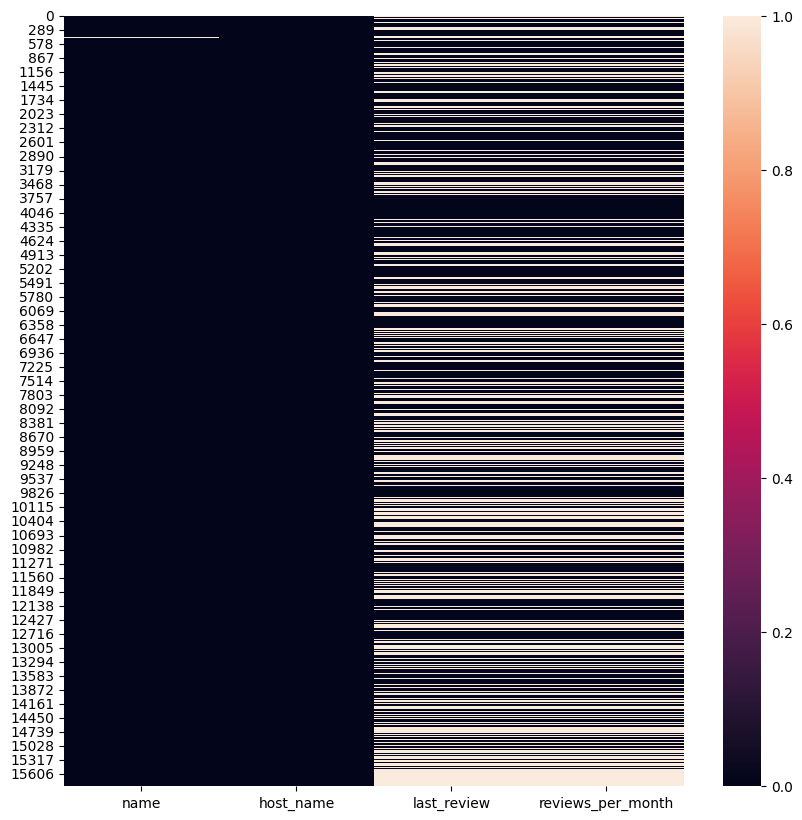

In [7]:
# sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['name','host_name','last_review','reviews_per_month']].isna())

#### **Penjelasan Missing Value**
Secara garis besar:  
* *Missing value* terjadi pada kolom `name`, `host_name`, `last_review` dan `reviews_per_month`.
* *missing value* di kolom `name` dan `host_name` memiliki proporsi cukup kecil (<10%).
* *Missing value* di kolom `last_review` dan `reviews_per_month` memiliki proporsi yang cukup tinggi (>10%), dengan *missing value* di kolom `last_review`, dan `reviews_per_month` adalah sama yaitu mencapai 36.52%.
* *Missing value* di kolom `last_review` dan `reviews_per_month` memiliki sebaran yang terlihat berkaitan, jika data di `last_review` kosong, maka kemungkinan besar data di `reviews_per_month` juga kosong. Hal ini dikarenakan `last_review` mewakili sebagai tanggal terakhir customer memberikan review di listing tersebut dan kolom `reviews_per_month` adalah rata - rata jumlah review yang diperoleh dalam waktu sebulan.

Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah *missing value* yang tergolong cukup tinggi (sampai 36%).
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi *missing value*, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

##### **Kolom `name`**

In [8]:
# jumlah missing value di kolom name
df['name'].isna().sum()

8

In [9]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat 8 data kosong pada kolom `name`.
- Host name `Pakaphol` memiliki `calculated_host_listings_count` berjumlah 3. Kita dapat berasumsi bahwa host name ini memiliki listings dengan `name` yang sama.
- Pada 7 missing value lainnya tidak terdapat persamaan yang dapat digunakan untuk mengisi pada data kosong tersebut.
- Untuk 7 missing value lainnya kita dapat berasumsi dua hal:
    - Ketika host mendaftar untuk pembuatan listing pada Airbnb, mungkin listing memang dapat dibuat tanpa mencantumkan nama listing atau terjadi suatu kesalahan teknis ketika host memasukan nama listing.
    - Listing tersebut sudah tidak beroperasi lagi. Hal ini dikarenakan pada ke 7 listing tersebut, jumlah dari masing-masing data kosong pada kolom `availability_365` berjumlah **365** dan hanya 1 listing yang pernah mendapatkan review pada tahun 2017, yaitu lisiting dengan host name `Diamond Bangkok`.

Tindakan untuk missing value:
- Memeriksa jika host name `Pakaphol` memiliki listings dengan `name` yang sama, jika ya maka data akan diisi.
- Menghapus 7 missing value lainnya karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [10]:
# pemeriksaan kolom name yang kosong berdasarkan host_name dan calculated_host_listings_count
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [11]:
# mengisi kolom name yang kosong berdasarkan host_name yang sama
df['name'].iloc[2075] = 'Errday Guest House'
df[df['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [12]:
# menghapus baris data yang memiliki missing value pada kolom name
df = df.dropna(subset=['name'])
df['name'].isna().sum()

0

##### **Kolom `host_name`**

In [13]:
# jumlah missing value di kolom host_name
df['host_name'].isna().sum()

1

In [14]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat 1 data kosong pada kolom `host_name`
- Untuk missing value tersebut kita dapat berasumsi berdasarkan nilai pada kolom `availability_365` yang berjumlah 365 maka dapat kita artikan bahwa listing tersebut tidak ada yang menyewa dan terakhir mendapatkan review pada tahun 2017.

Tindakan untuk missing value:
- Menghapus missing value karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [15]:
# menghapus baris data yang memiliki missing value pada kolom host_name
df = df.dropna(subset=['host_name'])
df['host_name'].isna().sum()

0

##### **Kolom `last_review` dan `reviews_per_month`**

In [16]:
# jumlah missing value di kolom last_review dan reviews_per_month
df[['last_review','reviews_per_month']].isna().sum()

last_review          5784
reviews_per_month    5784
dtype: int64

In [17]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [18]:
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat 5784 data kosong pada kolom `last_review` dan `reviews_per_month`
- Untuk missing value tersebut kita dapat berasumsi berdasarkan nilai pada kolom `number_of_reviews` yang bernilai 0 maka dapat kita artikan bahwa listing tersebut belum pernah mendapatkan review.

Tindakan untuk missing value:
- Missing value pada kolom `last_review` akan diisi dengan No Reviews.
- Pada bagaian awal data understanding and cleaning kita dapat mengetahui bahwa kolom `last_review` memiliki tipe data `object` dan dapat diganti menjadi `datetime` berdasarkan isi kolom. Namun dikarenakan kita ingin mengisi missing value dengan No Reviews, maka tipe data kolom `last_review` tidak akan diubah, karena tipe data `datetime` tidak dapat menerima `string`.
- Missing value pada kolom `number_of_review` akan diisi dengan nilai 0.

In [19]:
# mengisi missing value pada kolom last_review dengan 'No Reviews'
df['last_review'].fillna('No Reviews', inplace=True)

In [20]:
# mengisi missing value pada kolom last_review dengan nilai 0
df['reviews_per_month'].fillna(0, inplace=True)

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,No Reviews,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,No Reviews,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,No Reviews,0.00,3,365,0


In [22]:
df[['last_review','reviews_per_month']].isna().sum()

last_review          0
reviews_per_month    0
dtype: int64

### **Duplicate Data**

In [23]:
# jumlah duplikat data pada seluruh kolom
df.duplicated().sum()

0

**Penjelasan**

Kita bisa melihat bahwa:
- Terdapat 0 data duplikat jika diperiksa pada seluruh kolom.

### **Outliers**

#### **Distribusi Data `price` Berdasarkan `room_type`**

<Axes: xlabel='price', ylabel='room_type'>

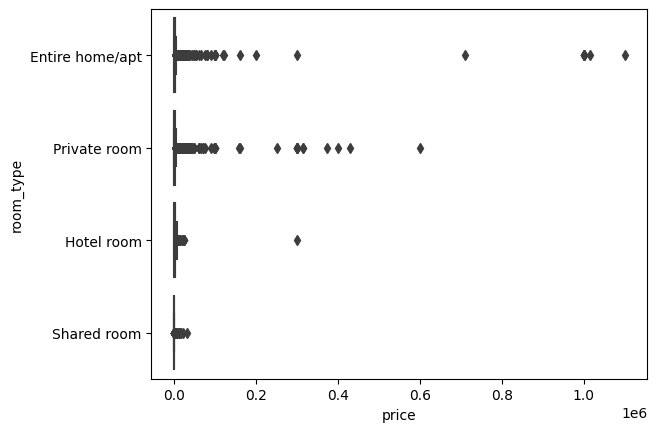

In [24]:
# visualisasi distribusi data price berdasarkan room_type
sns.boxplot(data = df,x='price', y='room_type')

In [25]:
df[df['room_type']=='Entire home/apt'].sort_values('price',ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12868,635676064543597376,New 1 bedroom apartment BTS MRT Asoke,12464705,Lucio,Vadhana,13.742186,100.560394,Entire home/apt,1100000,14,0,No Reviews,0.00,1,365,0
12300,562972065309061724,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,131427125,Jj,Vadhana,13.746660,100.559100,Entire home/apt,1014758,30,2,2022-09-17,0.32,10,75,2
6289,29909847,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,210559448,Cora,Khlong Toei,13.703330,100.592470,Entire home/apt,1000000,2,69,2020-03-12,1.39,6,90,0
1779,11579635,"2 Bedroom,wifi,5mMRT&Shopping Mall",30803267,Yasmine,Huai Khwang,13.754710,100.565980,Entire home/apt,1000000,100,53,2018-02-20,0.64,4,249,0
4620,23740993,"Modern&Luxury apartment,5min to MRT,freeWifi",30803267,Yasmine,Huai Khwang,13.760650,100.568980,Entire home/apt,1000000,1,12,2020-03-24,0.22,4,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,44327659,"Cozy condo, south of Chao Phraya, 100m from BTS",187810737,Lucy,Thon buri,13.721110,100.492850,Entire home/apt,348,360,0,No Reviews,0.00,1,364,0
9657,40682461,Stay in Bangkok,300906280,อัญชลี,Bang Kapi,13.801650,100.617990,Entire home/apt,346,2,5,2022-11-18,0.18,3,326,4
1481,9465632,Condo near BTS - Bangwa Station,48621743,Joke,Phasi Charoen,13.720890,100.459850,Entire home/apt,346,180,0,No Reviews,0.00,1,365,0
5246,26251682,Elio Condominium near Sukhumvit Onnut,66095049,Michael,Phra Khanong,13.687070,100.599630,Entire home/apt,337,60,0,No Reviews,0.00,1,96,0


In [26]:
df[df['room_type']=='Private room'].sort_values('price',ascending=False)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4373,22633450,rm 1 : cozy & comfy,117057915,Jeab,Bang Phlat,13.791630,100.490380,Private room,600700,1,9,2020-01-26,0.17,5,330,0
11885,52940323,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,99882630,Jiranuch,Bang Kapi,13.760820,100.633660,Private room,429443,1,0,No Reviews,0.00,1,313,0
12792,629653142142561774,rm 6 : bright morning sunlight.,117057915,Jeab,Bang Phlat,13.790490,100.488160,Private room,400717,1,0,No Reviews,0.00,5,241,0
6549,31365769,"WH (container, Double bed, 2ppl -F)",234881965,Napawadee,Khlong Toei,13.735140,100.552170,Private room,372227,1,24,2020-01-27,0.50,4,147,0
6760,31364368,"WH (Container style, twin bed, 2ppl, citycenter-A)",234881965,Napawadee,Khlong Toei,13.735050,100.552390,Private room,314899,1,4,2020-02-24,0.10,4,147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11663,49745793,วิภาแมนชั่น ติดถนนลาดพร้าว83 สะดวกและสบาย,360388789,นิภาวรรรณ,Wang Thong Lang,13.785760,100.614520,Private room,315,120,0,No Reviews,0.00,1,365,0
7831,34752495,Local life near svarnmbumi airport ; nature,131930129,Gondal,Nong Chok,13.814480,100.835430,Private room,310,1,0,No Reviews,0.00,1,89,0
8974,38406752,🏡5 mins walk to 🚅 Cozy room in a local living😊,29685153,Mon,Phasi Charoen,13.726350,100.465140,Private room,304,2,16,2022-10-10,0.42,2,330,11
9529,40547972,Private fan room with local family,314098135,Khwanjai,Bangkok Noi,13.754210,100.470770,Private room,300,1,1,2019-12-27,0.03,1,227,0


In [27]:
df[df['room_type']=='Hotel room'].sort_values('price',ascending=True)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.56420,Hotel room,0,1,0,No Reviews,0.00,1,0,0
2770,16443912,4Beds Female Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75451,100.50229,Hotel room,318,1,1,2018-01-08,0.02,5,271,0
8983,38611956,Mind Day Hostel Khaosan - 12 Mixed Dormitory,277316591,Mindday,Phra Nakhon,13.76276,100.49761,Hotel room,318,1,2,2021-07-10,0.05,6,365,0
2748,16397601,8Beds Mixed Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75440,100.50423,Hotel room,318,1,0,No Reviews,0.00,5,271,0
8445,37029994,Mind day Hostel Khaosan 12-Mixed DormitoryFL.3,277316591,Mindday,Phra Nakhon,13.76101,100.49881,Hotel room,326,1,4,2021-11-21,0.10,6,363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6282,30329202,Bedroom In Town Central of Sukhumvit Near BTS,226941360,Patawan,Vadhana,13.74218,100.55802,Hotel room,23029,1,0,No Reviews,0.00,6,0,0
6283,30329222,One Bed In The City of Sukhumvit Near SkyTrain,226941360,Patawan,Vadhana,13.74226,100.55934,Hotel room,23629,1,0,No Reviews,0.00,6,0,0
6281,30329172,European Design In The City Near Shopping Mall,226941360,Patawan,Vadhana,13.74248,100.55770,Hotel room,23671,1,0,No Reviews,0.00,6,89,0
3415,19469957,Stylish 2 Bedroom Apartment in Ekkamai,33550104,Kasamsan,Vadhana,13.73511,100.59068,Hotel room,24390,2,62,2022-12-05,0.94,6,179,6


**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat outlires (persebaran data ekstrim) pada kolom `price` berdasarkan `room_type`. Pada kategori `Entire home/apt`,`Private room`, dan `Hotel room` terdapat listing dengan `price` yang tinggi.
-  Berdasarkan domain knowladge dan kondisi dataset, kita dapat berasumsi bahwa, [Airbnb membebaskan host untuk menentukan harga listing mereka](https://www.airbnb.com/help/article/52). Hal tersebut juga diperkuat dengan bukti beberapa listing dengan harga tinggi sudah pernah direview.
- Terdapat anomali pada salah satu listing yang berkategori `Hotel room`. Listing `Somerset Maison Asoke Bangkok` memiliki nilai `price` 0. Meskipun Airbnb membebaskan host untuk menentukan harga listing mereka, hal tersebut tidak memungkinkan karena tidak masuk akal menyewakan hotel secara gratis.

Tindakan untuk outlires:
- Listing `Somerset Maison Asoke Bangkok` yang memiliki nilai `price` 0 akan dihapus karena berdasarkan domain knowladge, data tidak valid.
- Data lainnya akan dipertahankan karena berdasarkan kondisi dataset dan domain knowladge, data valid.

In [28]:
# menghapus data dengan price yang bernilai 0
df = df[df['price']>0]
df[df['room_type']=='Hotel room'].sort_values('price',ascending=False).tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6170,30240982,Mum Sabaay Hostel,227101089,Phrawpanthana,Sathon,13.71624,100.52066,Hotel room,330,1,0,No Reviews,0.00,1,0,0
8445,37029994,Mind day Hostel Khaosan 12-Mixed DormitoryFL.3,277316591,Mindday,Phra Nakhon,13.76101,100.49881,Hotel room,326,1,4,2021-11-21,0.10,6,363,0
8983,38611956,Mind Day Hostel Khaosan - 12 Mixed Dormitory,277316591,Mindday,Phra Nakhon,13.76276,100.49761,Hotel room,318,1,2,2021-07-10,0.05,6,365,0
2770,16443912,4Beds Female Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75451,100.50229,Hotel room,318,1,1,2018-01-08,0.02,5,271,0
2748,16397601,8Beds Mixed Dormitory@Baan 89 Hostel,62060341,Baan 89,Phra Nakhon,13.75440,100.50423,Hotel room,318,1,0,No Reviews,0.00,5,271,0


#### **Distribusi Data `number_of_reviews` Berdasarkan `room_type`**

<Axes: xlabel='number_of_reviews', ylabel='room_type'>

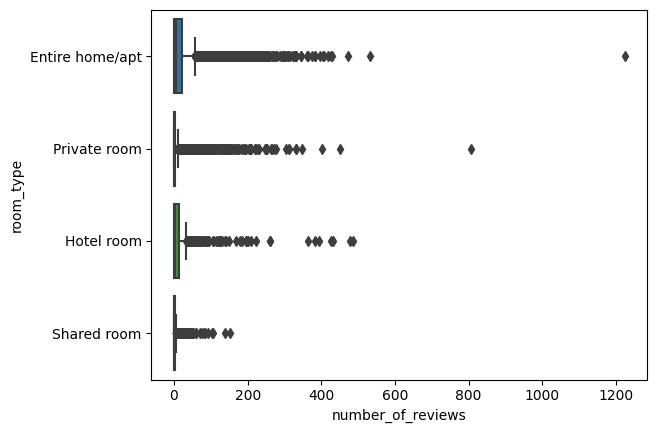

In [29]:
# visualisasi distribusi data number_of_reviews berdasarkan room_type
sns.boxplot(data = df,x='number_of_reviews', y='room_type')

In [30]:
df[df['room_type']=='Entire home/apt'].sort_values('number_of_reviews',ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3737,20869092,Beautiful One Bedroom Apartment Near Skytrain,116193397,Suchada,Phaya Thai,13.77369,100.54079,Entire home/apt,1571,3,1224,2022-12-16,19.13,1,310,109
1470,9453790,37 Nature House: 10 mins to DMK Int'l Airport,35462876,Wuthiphon,Lak Si,13.87145,100.58039,Entire home/apt,1039,1,533,2022-12-04,6.22,9,346,18
53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,13.71192,100.51535,Entire home/apt,866,2,472,2022-12-15,4.02,7,320,29
80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,13.72062,100.54707,Entire home/apt,829,1,430,2022-10-01,3.39,37,334,10
127,605314,☀ ☼Sky bedroom with a smooth life view☼☀,1927968,Evan,Sathon,13.72061,100.54706,Entire home/apt,750,1,426,2022-12-08,3.39,37,344,10


In [31]:
df[df['room_type']=='Private room'].sort_values('number_of_reviews',ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6586,31077175,FREE PICK UP⭐BKK AIRPORT/BREAKFAST/PRIVATE DELUXE,158545122,Pailin,Lat Krabang,13.72132,100.76495,Private room,1032,1,807,2022-12-12,16.62,3,348,146
1673,11753619,near DMK: Don Mueang International Airport,48491149,Auttapon,Don Mueang,13.88852,100.59296,Private room,911,1,451,2022-12-26,5.70,5,356,3
2725,16245152,Ba hao Residence x MAITRI CHIT ROOM,2389272,Bua,Pom Prap Sattru Phai,13.74030,100.51407,Private room,3714,1,402,2022-12-12,5.84,2,253,73
2281,14493164,Private Cozy Room (Free Breakfast) 20 mins to DMK,71898274,Kay,Chatu Chak,13.80137,100.57047,Private room,849,1,348,2022-12-05,4.53,3,328,10
2812,17007746,Comfort chic & budget on 4 fl -walk to RoyalPalace,4381385,Phil,Phra Nakhon,13.74820,100.49683,Private room,867,1,330,2022-11-26,4.60,8,147,17


In [32]:
df[df['room_type']=='Hotel room'].sort_values('number_of_reviews',ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
905,5964843,The Mustang Nero/No.4 The Horse,30963587,Themustang,Khlong Toei,13.71143,100.59390,Hotel room,2329,1,486,2022-12-06,5.26,10,47,6
622,6013487,The Mustang Nero/No.3 The Wolf,30963587,Themustang,Khlong Toei,13.71286,100.59172,Hotel room,2329,1,477,2022-11-22,5.11,10,50,6
1462,9849435,The Mustang Nero/No.7 The Zebra Song,30963587,Themustang,Khlong Toei,13.71150,100.59397,Hotel room,2329,1,433,2022-12-20,5.06,10,44,19
623,6033632,The Mustang Nero/No.2 Black Bird,30963587,Themustang,Khlong Toei,13.71136,100.59217,Hotel room,2000,1,426,2020-02-07,4.65,10,0,0
625,6033826,The Mustang Nero/No.1 Magic Dragon,30963587,Themustang,Khlong Toei,13.71174,100.59380,Hotel room,2286,1,393,2022-12-26,4.29,10,2,2


**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat outlires pada kolom `number_of_reviews` berdasarkan `room_type`. Pada kategori `entire home/apt`, `private room`, dan `hotel room` terdapat listing yang memiliki `number_of_reviews` yang tinggi.  
-  Berdasarkan domain knowladge kita menegetahui bahwa, Airbnb membebaskan user dalam pemberian review. User dapat memberi untuk memberi review atau tidak memberi review.

Tindakan untuk outlires:
- Data dipertahankan karena berdasarkan domain knowladge, data valid.

#### **Distribusi Data `minimum_nights` berdasarkan `room_type`**

<Axes: xlabel='minimum_nights', ylabel='room_type'>

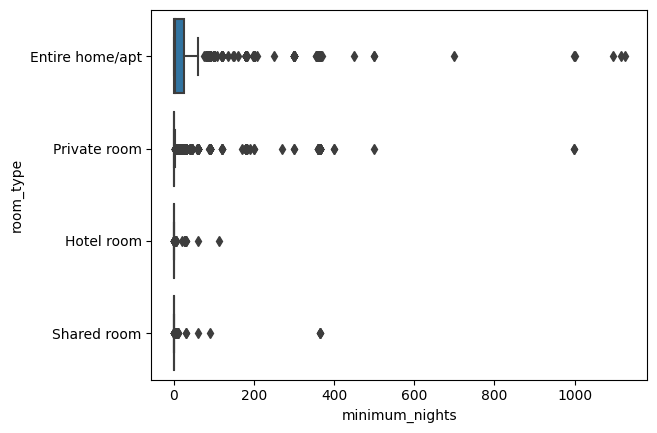

In [33]:
# visualisasi distribusi data minimum_nights berdasarkan room-type
sns.boxplot(data = df,x='minimum_nights', y='room_type')

In [34]:
df[df['room_type']=='Entire home/apt'].sort_values('minimum_nights',ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0
7986,35165443,Wonderful apartment for you holiday in Thai,86991723,Yang,Bang Na,13.67260,100.60352,Entire home/apt,2000,1115,0,No Reviews,0.00,2,358,0
11524,49032568,Freehold Condo near Bangsue Grand Station,4661237,Chayanid,Bang Sue,13.80697,100.52362,Entire home/apt,554,1095,0,No Reviews,0.00,1,358,0
10153,41623113,blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasakBTS,162537040,Songnya,Sathon,13.71195,100.52055,Entire home/apt,650,1000,2,2020-03-08,0.06,13,179,0
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,2022-10-30,0.26,7,365,5


In [35]:
df[df['room_type']=='Private room'].sort_values('minimum_nights',ascending=False).head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11243,45051929,Bellevue Boutique Bangkok | Airport Link HUA-MAK,165329146,Sataporn,Suanluang,13.73633,100.63836,Private room,1314,999,0,No Reviews,0.00,2,181,0
10644,42685153,The Prime Sukhumvit 11 - Room 29/150,337709866,Vatiaz,Vadhana,13.74426,100.55758,Private room,15143,999,0,No Reviews,0.00,1,89,0
4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,500,3,2018-07-31,0.05,1,0,0
11416,48046291,โฮมสเตย์บ้านมิตรภาพ,387329237,ไตรทศ,Dusit,13.78270,100.51733,Private room,400,400,0,No Reviews,0.00,1,365,0
1134,7625178,วิวล่า สิขลา,39999413,อัครพล,Vadhana,13.74159,100.57977,Private room,65000,399,0,No Reviews,0.00,1,365,0


##### **Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Terdapat outlires pada kolom `minimum_nights` berdasarkan `room_type`. Tipe penginapan `entire home/apt` dan `private room` memiliki waktu penyewaan yang melebihi 1 tahun atau 365.
- Kita dapat berasumsi bahwa, Airbnb memungkinkan kita untuk memesan penginapan dengan waktu lebih dari 1 tahun. Hal ini diperkuat dengan adanya `number_of_reviews` pada listing yang memiliki `minimum_nights` lebih dari 1 tahun.

Tindakan untuk outlires:
- Data dipertahankan karena berdasarkan domain knowladge, data valid.

### **Adding New Column**

#### **Adding `area` Column**

In [36]:
df['neighbourhood'].nunique()

50

In [37]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

##### **Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Pada dataset Airbnb Listing Bangkok terdapat 50 daerah unik pada kolom `neighbourhood`.

Tindakan:
- 50 daerah tersebut akan dikategorikan kedalam 4 area berdasarkan dengan letak geografi distriknya.
- Kita akan membuat kolom baru bernama `area` yang memiliki 4 kategori yaitu `CBD (Central Business District)`, `North Bangkok`, `West Bangkok`, dan `East Bangkok`.
- Tujuan dari pembuatan kolom `area` ini adalah untuk mempermudah dalam tahap analisis.

In [38]:
# mengkategorikan kolom neighbourhood
def categorize_area(neighbourhood):
    cbd = ["Yan na wa","Ratchathewi", "Sathon", "Khlong Toei", "Vadhana", "Phaya Thai", "Bang Rak", "Wang Thong Lang", "Huai Khwang", "Parthum Wan", "Phra Nakhon", "Samphanthawong", "Pom Prap Sattru Phai", "Pra Wet"]
    north = ["Thon buri","Lat Krabang", "Bangkok Yai", "Bang Sue", "Dusit", "Lak Si", "Thon Buri", "Yan Nawa", "Don Mueang", "Bang Khen", "Lat Phrao", "Bang Bon", "Bueng Kum"]
    east = ["Bang Khun thain","Bang Na", "Bang Kapi", "Lat Krabang", "Min Buri", "Khan Na Yao", "Khlong Sam Wa", "Bang Khae", "Bang Khun Thain", "Taling Chan", "Phasi Charoen"]
    west = ["Thung khru","Bang Kho laen","Din Daeng", "Bang Kho Laen", "Rat Burana", "Chatu Chak", "Khlong San", "Suanluang", "Nong Chok", "Phra Khanong", "Thawi Watthana", "Sai Mai", "Bang Phlat", "Saphan Sung", "Min Buri", "Thawi Watthana", "Sai Mai", "Bang Phlat", "Saphan Sung", "Chom Thong", "Bangkok Noi", "Nong Khaem", "Thung Khru"]

    if neighbourhood in cbd:
        return "CBD"
    elif neighbourhood in north:
        return "North Bangkok"
    elif neighbourhood in east:
        return "East Bangkok"
    elif neighbourhood in west:
        return "West Bangkok"
    else:
        return "Unknown"

# membuat kolom baru bernama area
df['area'] = df['neighbourhood'].apply(categorize_area)

In [39]:
df['area'].unique()

array(['CBD', 'East Bangkok', 'West Bangkok', 'North Bangkok'],
      dtype=object)

In [40]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,area
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,CBD
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,No Reviews,0.00,2,358,0,East Bangkok
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,No Reviews,0.00,1,365,0,East Bangkok
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,West Bangkok
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,No Reviews,0.00,3,365,0,East Bangkok


#### **Adding `stay_type` Column**

In [41]:
df['minimum_nights'].nunique()

86

In [42]:
df['minimum_nights'].unique()

array([   3,    1,   60,    7,  250,    2,   15,   30,   28,   21,   27,
          4,  180,   90,    5,  358, 1125,   29,   14,  200,  365,  120,
          9,   12,  300,  360,  100,   10,   45,   23,    6,   84,  370,
         24,   31,   50,   19,   20,   75,    8,   25,   40,   26,   59,
         58,  170,  399,  998,   13,   22,  356,   16,  183,  700,  150,
         35,  355,  500,   89,   80,   18,   11,   85,  135,  198,   88,
        160,  109,  148,   51, 1115,  113,   62,  450,  270,   55,  208,
       1000,   17,  999,  400,   99, 1095,   39,  190,  364], dtype=int64)

**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Pada dataset Airbnb Listing Bangkok terdapat 86 nilai unik pada kolom `minimum_nights`.

Tindakan:
- 86 nilai unik pada kolom `minimum_nights` akan dikategorikan kedalam 3 berdasarkan durasi dari `minimum_nights` itu sendiri.
- Kita akan membuat kolom baru bernama `stay_type` yang memiliki 3 kategori yaitu `Short Term`, `Medium Term` dan `Long Term`.
- Kategori `Short Term` akan digunakan untuk listing yang memiliki `minimum_nights`<= 7 malam.
- Kategori `Medium Term` akan digunakan untuk listing yang memiliki `minimum_nights`<= 30 malam.
- Kategori `Long Term` akan digunakan untuk listing yang memiliki `minimum_nights`> 30 malam.
- Tujuan dari pembuatan kolom `stay_type` ini adalah untuk mempermudah proses analisis.

In [43]:
# mengkategorikan kolom minimum_nights
short_term = 7
medium_term = 30

def categorize_minimum_nights(minimum_nights):
    if minimum_nights <= short_term:
        return "Short Term"
    elif minimum_nights <= medium_term:
        return "Medium Term"
    else:
        return "Long Term"

# membuat kolom baru bernama stay_type
df['stay_type'] = df['minimum_nights'].apply(categorize_minimum_nights)

In [44]:
df['stay_type'].unique()

array(['Short Term', 'Long Term', 'Medium Term'], dtype=object)

#### **Adding `price_type` Column**

In [45]:
df['price'].nunique()

3039

In [46]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

print('lower bound: ',q1)
print('upper bound: ',q3)

lower bound:  900.0
upper bound:  2429.0


<Axes: ylabel='price'>

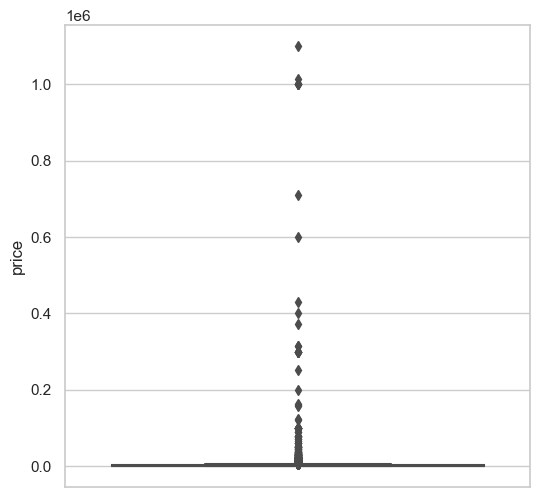

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['price'])

**Penjelasan dan Tindakan**

Kita bisa melihat bahwa:
- Pada dataset Airbnb Listing Bangkok terdapat xx nilai unik pada kolom `price`.
- lower bound dari kolom `price` sebesar
- upper bound dari kolom `price` sebesar:

Tindakan:
- xx nilai unik pada kolom `price` akan dikategorikan kedalam 3 berdasarkan quantile dari persebaran data di kolom `price`
- Kita akan membuat kolom baru bernama `price_type` yang memiliki 3 kategori yaitu `Economical`, `Midrange` dan `Luxury`.
- Kategori `Economical` akan digunakan untuk listing yang memiliki `price`<= quartile 1
- Kategori `Midrange` akan digunakan untuk listing yang memiliki `price`<= quartile 3.
- Kategori `Luxury` akan digunakan untuk listing yang memiliki `price`> quartile 3.
- Tujuan dari pembuatan kolom `price` ini adalah untuk mempermudah proses analisis.

In [48]:
def categorize_price(price):
    if price <= q1:
        return 'Economical'
    elif price <= q3:
        return 'Midrange'
    else:
        return 'Luxury'

df['price_type'] = df['price'].apply(categorize_price)

In [49]:
df['price_type'].value_counts()

price_type
Midrange      7782
Economical    4102
Luxury        3961
Name: count, dtype: int64

### **Selecting Relevant Columns for Analysis**
Untuk mempermudah tahap analisis, kita akan memilih kolom-kolom yang dirasa relevan dengan rumusan masalah. Untuk menjawab rumusan masalah, kita akan memilih kolom:
- id
- name
- host_id
- host_name
- neighbourhood
- area
- room_type
- stay_type
- price
- number_of_reviews

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15845 non-null  int64  
 1   name                            15845 non-null  object 
 2   host_id                         15845 non-null  int64  
 3   host_name                       15845 non-null  object 
 4   neighbourhood                   15845 non-null  object 
 5   latitude                        15845 non-null  float64
 6   longitude                       15845 non-null  float64
 7   room_type                       15845 non-null  object 
 8   price                           15845 non-null  int64  
 9   minimum_nights                  15845 non-null  int64  
 10  number_of_reviews               15845 non-null  int64  
 11  last_review                     15845 non-null  object 
 12  reviews_per_month               15845

In [51]:
# membuat df baru dan memilih kolom-kolom yang akan digunakan
df=df[["id", "name", "host_id", "host_name","area","neighbourhood","room_type","stay_type","price","price_type","number_of_reviews"]]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 15845 non-null  int64 
 1   name               15845 non-null  object
 2   host_id            15845 non-null  int64 
 3   host_name          15845 non-null  object
 4   area               15845 non-null  object
 5   neighbourhood      15845 non-null  object
 6   room_type          15845 non-null  object
 7   stay_type          15845 non-null  object
 8   price              15845 non-null  int64 
 9   price_type         15845 non-null  object
 10  number_of_reviews  15845 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


### **Reset Index**
Setelah melakukan handling terhadap missing value, duplicate data, dan outliers kita disarankan untuk mengatur ulang index yang ada.

In [53]:
df.tail()

,id,name,host_id,host_name,area,neighbourhood,room_type,stay_type,price,price_type,number_of_reviews
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,CBD,Pra Wet,Private room,Medium Term,2298,Midrange,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1429,Midrange,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0


In [54]:
df = df.reset_index(drop=True)
df.tail()

,id,name,host_id,host_name,area,neighbourhood,room_type,stay_type,price,price_type,number_of_reviews
15840,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,CBD,Pra Wet,Private room,Medium Term,2298,Midrange,0
15841,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1429,Midrange,0
15842,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0
15843,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0
15844,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,CBD,Ratchathewi,Private room,Short Term,1214,Midrange,0


Penjelasan:
- Setelah dilakukan reset index dataset Airbnb Listings Bangkok memiliki index terbesar akhir di nilai 15.844 yang sebelumnya memiliki index terbesar di nilai 15.853

## **Clean Data**

In [55]:
# menampilkan informasi umum dari data yang sudah dibersihkan
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(15845, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,id,int64,0,15845,"[2135883, 39062954]"
1,name,object,0,14792,"[One cosy bedroom in center Bkk, Condo for rent near DMG airport]"
2,host_id,int64,0,6650,"[110093848, 164469340]"
3,host_name,object,0,5305,"[Anan, Zhang]"
4,area,object,0,4,"[East Bangkok, CBD]"
5,neighbourhood,object,0,50,"[Bang Khae, Bang Sue]"
6,room_type,object,0,4,"[Hotel room, Private room]"
7,stay_type,object,0,3,"[Long Term, Medium Term]"
8,price,int64,0,3039,"[1623, 2214]"
9,price_type,object,0,3,"[Economical, Luxury]"


Penjelasan:
- Setelah melewati tahapan Data Understanding dan Data Cleaning, dataset yang sebelumnya memiliki 16 kolom dan 15.854 baris, sekarang memiliki 10 kolom dan 15.845 baris.
- Dari total terdapat missing value yang ada, 8 baris data dihapus dan sisa data kosong diisi dengan data yang dirasa relevan.
- Terdapat 1 data anomali yang dihapus karena berdasarkan domain knowladge, data dirasa tidak valid.

In [56]:
# menyimpan data yang sudah melewati tahap data cleaning ke format .csv
df.to_csv('Airbnb Listings Bangkok Clean.csv',index=False)

# **Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Apa saja kriteria yang mempengaruhi *guest* untuk memilih listing?**.

Dari data yang kita miliki, kita dapat menginterpretasi listingan yang sering dipilih oleh *guest* berdasarkan data review yang dimiliki setiap listing.

## **Analisis Area**

In [57]:
# jumlah listing per area
df['area'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,area,jumlah_listing
0,CBD,10310
1,West Bangkok,3065
2,North Bangkok,1287
3,East Bangkok,1183


In [58]:
# jumlah listing per neighbourhood
df.groupby(['area', 'neighbourhood']).size().reset_index(name='jumlah_listing').sort_values(by='jumlah_listing',ascending=False).reset_index(drop=True).head(20)

,area,neighbourhood,jumlah_listing
0,CBD,Vadhana,2150
1,CBD,Khlong Toei,2097
2,CBD,Huai Khwang,1125
3,CBD,Ratchathewi,1113
4,CBD,Bang Rak,827
5,CBD,Sathon,809
6,CBD,Phra Nakhon,619
7,West Bangkok,Phra Khanong,557
8,West Bangkok,Chatu Chak,548
9,East Bangkok,Bang Na,457


In [59]:
# proporsi listing per area
listing_distribution=df['area'].value_counts()/ len(df)*100
listing_distribution.reset_index().rename(columns={'count':'jumlah_listing'})

,area,jumlah_listing
0,CBD,65.067845
1,West Bangkok,19.343642
2,North Bangkok,8.122436
3,East Bangkok,7.466078


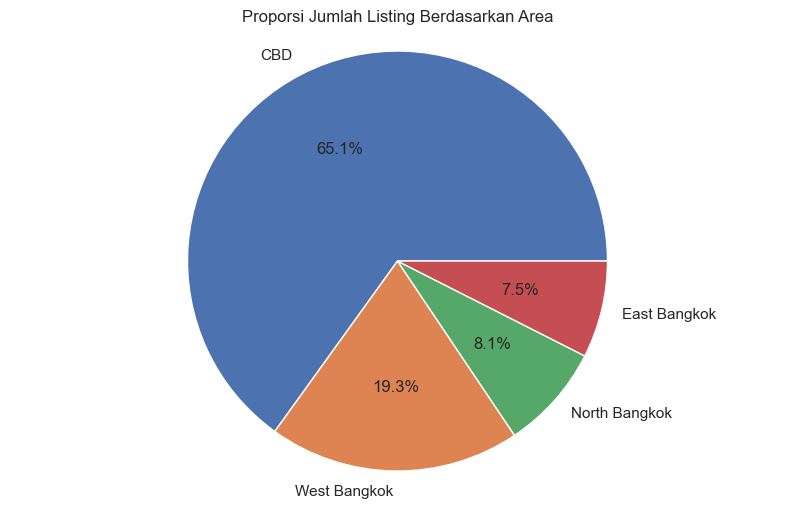

In [60]:
# visualisasi proporsi listing per area
area_counts = df['area'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%')
plt.title('Proporsi Jumlah Listing Berdasarkan Area')
plt.axis('equal')
plt.show()

**Penjelasan**

Dari hasil analisis diatas, dapat diketahui bahwa area CBD memiliki jumlah listing terbanyak dibandingkan dengan area West Bangkok, North Bangkok, dan East Bangkok. Berikut merupakan karakteristik per daerah berdasarkan riset:

- **CBD** adalah pusat finansial dan komersial yang mengesankan dengan gedung pencakar langit yang menjulang tinggi, seperti Mahanakhon dan Baiyoke Tower II. Central Business District (CBD) Bangkok berletak di tengah kota Bangkok, yang memamerkan kehidupan perkotaan yang sibuk dengan gedung-gedung perkantoran, pusat perbelanjaan mewah, hotel-hotel bintang lima, dan restoran-restoran eksklusif. 
- **West Bangkok** adalah area Bangkok yang memiliki kekayaan budaya dan kehidupan lokal yang kuat di Thailand. Terletak di bagian barat Bangkok, daerah ini menawarkan pengalaman unik bagi para pengunjung yang ingin menjelajahi aspek-aspek budaya Thailand.
- **North Bangkok** adalah area Bangkok yang menawarkan kontras menarik dengan kehidupan metropolitan pusat kota. Daerah yang terletak di bagian utara kota Bangkok ini dipenuhi dengan kebun-kebun bunga yang indah, taman-taman yang hijau, serta tempat-tempat rekreasi. 
- **East Bangkok** merupakan salah satu area yang berperan penting dalam perekonomian Thailand. Wilayah ini merupakan pusat industri dan komersial, serta menjadi lokasi Bandara Internasional Suvarnabhumi yang merupakan salah satu yang tersibuk di Asia Tenggara.

In [61]:
# jumlah masing-masing stay type per area
pd.crosstab(df['area'], df['stay_type'])

stay_type,Long Term,Medium Term,Short Term
area,,,
CBD,465,1842,8003
East Bangkok,85,218,880
North Bangkok,66,188,1033
West Bangkok,252,626,2187


In [62]:
# kolerasi antara area dan stay type
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df['area'], df['stay_type']))

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area' dan 'stay_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area' dan 'stay_type'.")

Chi-square statistic: 99.86417854277009
P-value: 2.678486936219763e-19
Terdapat hubungan yang signifikan antara 'area' dan 'stay_type'.


In [63]:
# proporsi stay type di area Bangkok
pd.crosstab(df['area'], df['stay_type']).div(pd.crosstab(df['area'], df['stay_type']).sum(axis=1), axis=0)

stay_type,Long Term,Medium Term,Short Term
area,,,
CBD,0.045102,0.178661,0.776237
East Bangkok,0.071851,0.184277,0.743872
North Bangkok,0.051282,0.146076,0.802642
West Bangkok,0.082219,0.204241,0.713540


<Figure size 1000x600 with 0 Axes>

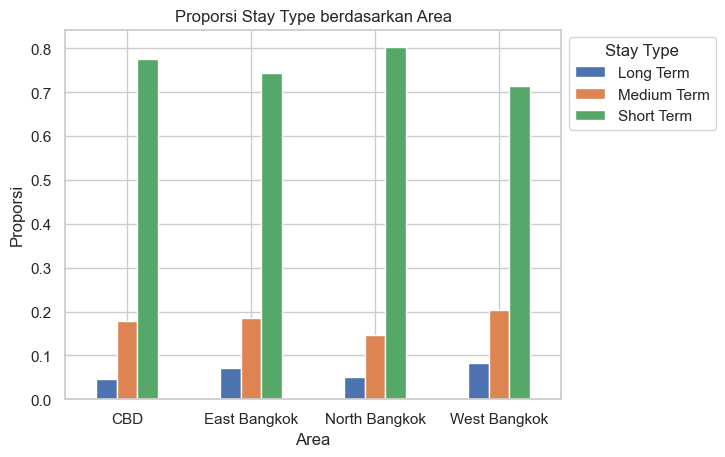

In [64]:
# visualisasi proporsi stay type berdasarkan area
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = pd.crosstab(df['area'], df['stay_type']).div(pd.crosstab(df['area'], df['stay_type']).sum(axis=1), axis=0).plot(kind='bar')

plt.xlabel('Area')
plt.ylabel('Proporsi')
plt.title('Proporsi Stay Type berdasarkan Area')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Stay Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

**Penjelasan**

Dapat kita lihat bahwa grafik menunjukkan bahwa mayoritas listing menawarkan durasi minimal menginap yang relatif singkat. Durasi minimal menginap yang singkat ini umumnya didefinisikan sebagai kurang dari atau sama dengan 7 malam.

Ada beberapa faktor yang mungkin dapat menjelaskan mengapa mayoritas listing di Bangkok menawarkan durasi minimal menginap yang singkat. Salah satu faktornya adalah karena Bangkok adalah kota tujuan wisata yang populer, dan banyak wisatawan hanya memiliki waktu yang singkat untuk mengunjungi kota ini. Secara keseluruhan, durasi minimal menginap yang singkat merupakan salah satu karakteristik umum dari listing akomodasi di Bangkok.

In [65]:
# jumlah number_of_reviews per area
reviews_area = df.groupby('area')['number_of_reviews'].sum().reset_index().sort_values(by='number_of_reviews', ascending=False).reset_index(drop=True)
reviews_area

,area,number_of_reviews
0,CBD,198305
1,West Bangkok,38950
2,North Bangkok,17192
3,East Bangkok,9581


In [66]:
# distribusi number_of_reviews per area
reviews_area['proporsi_review'] = (reviews_area['number_of_reviews'] / reviews_area['number_of_reviews'].sum()) * 100
reviews_area[['area', 'proporsi_review']]

,area,proporsi_review
0,CBD,75.107564
1,West Bangkok,14.752223
2,North Bangkok,6.511431
3,East Bangkok,3.628782


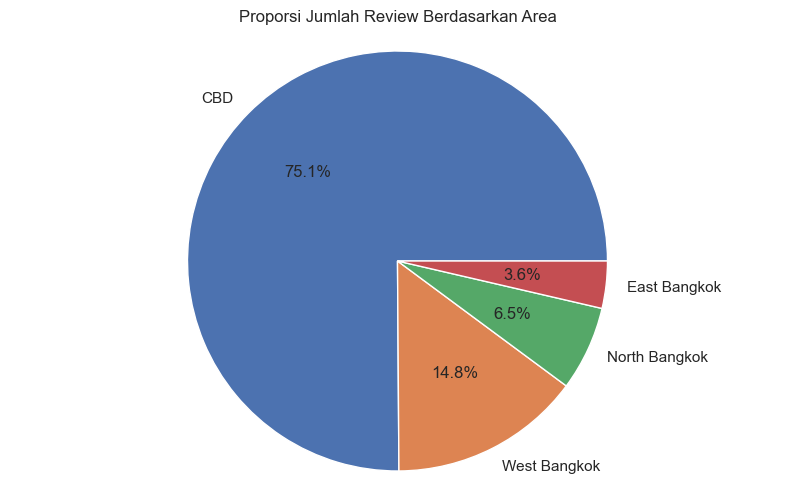

In [67]:
# visualisasi distribusi number_of_reviews per area
plt.figure(figsize=(10, 6))
plt.pie(reviews_area['proporsi_review'], labels=reviews_area['area'], autopct='%1.1f%%')
plt.title('Proporsi Jumlah Review Berdasarkan Area')
plt.axis('equal')

plt.show()

**Penjelasan**

Analisis diatas menunjukkan bahwa area CBD merupakan area yang paling banyak dipilih dan direview oleh wisatawan. Proporsi review untuk area CBD mencapai sekitar 75% dari total review untuk seluruh area di kota Bangkok. Ada beberapa faktor yang dapat menjelaskan mengapa area CBD begitu populer di kalangan wisatawan. Pertama, area CBD merupakan pusat kota Bangkok. Kedua, area CBD juga merupakan area dengan jumlah listing terbanyak di Bangkok.

Secara keseluruhan, area CBD merupakan area yang ideal bagi wisatawan yang ingin menjelajahi Bangkok secara maksimal. Area ini menawarkan semua yang dibutuhkan wisatawan, mulai dari tempat wisata, restoran, tempat hiburan, hingga transportasi dan akomodasi.


## **Analisi Tipe Penginapan**

In [68]:
# jumlah listing per room_type
df['room_type'].value_counts().reset_index().rename(columns={'count':'jumlah_listing'})

,room_type,jumlah_listing
0,Entire home/apt,8911
1,Private room,5763
2,Hotel room,648
3,Shared room,523


In [69]:
# proporsi jumlah listing per room_type
area_counts = df['room_type'].value_counts()
listing_distribution = area_counts/ len(df)*100
listing_distribution.reset_index().rename(columns={'count':'proporsi_listing'})

,room_type,proporsi_listing
0,Entire home/apt,56.238561
1,Private room,36.371095
2,Hotel room,4.089618
3,Shared room,3.300726


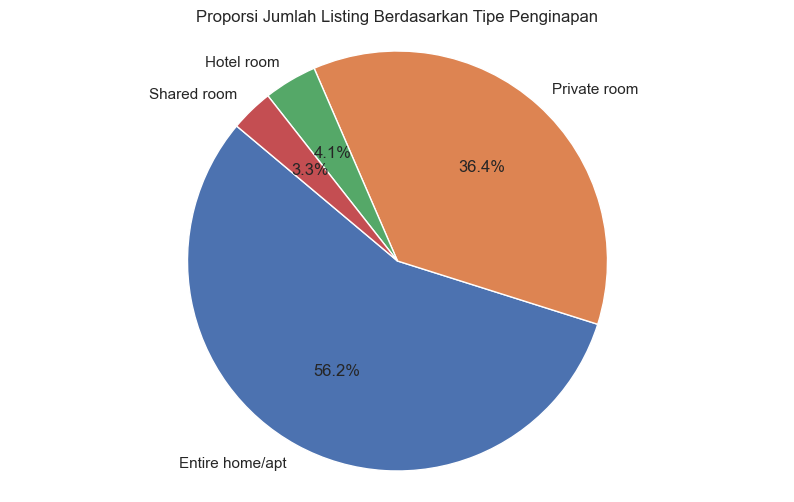

In [70]:
# visualisasi proporsi jumlah listing per room_type
plt.figure(figsize=(10, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Jumlah Listing Berdasarkan Tipe Penginapan')
plt.axis('equal')
plt.show()

**Penjelasan**

Berdasarkan data keseluruhan, tipe penginapan dengan proporsi terbanyak adalah entire home/apt, yaitu sekitar 56%. Diikuti oleh tipe private room, yaitu sekitar 36%. Hal ini menunjukkan bahwa host lebih banyak memiliki listing dengan tipe rumah dan apartemen.

Berikut adalah penjelasan tipe-tipe penginapan pada Airbnb:

- Entire Home/Apt

Umumnya tipe penginapan ini merupakan pilihan yang tepat bagi Anda yang menginginkan privasi dan kenyamanan layaknya di rumah sendiri. Akomodasi ini disewakan dengan periode yang berbagai macam. Mulai dari beberapa hari hingga beberapa minggu.

- Private Room

tipe penginapan yang menawarkan privasi namun tidak memerlukan ruang yang luas. Tipe ini biasanya disewakan untuk jangka waktu yang bervariasi, mulai dari beberapa hari hingga beberapa minggu.

- Hotel Room

tipe penginapan yang menawarkan kenyamanan dan layanan ala hotel. Tipe ini umumnya disewa untuk masa inap yang singkat. Anda akan mendapatkan fasilitas ekstra seperti restoran, kolam renang, atau gym yang biasanya terdapat di dalam hotel.

- Shared Room

tipe penginapan ini menawarkan akomodasi yang ekonomis dan memiliki konsep berbagi ruangan dengan tamu lain. tipe penginapan ini cukup populer untuk penginapan singkat. Anda akan berbagi fasilitas umum seperti tempat tidur bersama, kamar mandi bersama, serta ruang bersama seperti dapur atau ruang tamu.


In [71]:
# jumlah listing berdasarkan tipe penginapan per area
pd.crosstab(df['area'], df['room_type'])

room_type,Entire home/apt,Hotel room,Private room,Shared room
area,,,,
CBD,6129,535,3250,396
East Bangkok,619,12,540,12
North Bangkok,540,36,670,41
West Bangkok,1623,65,1303,74


In [72]:
# kolerasi antara area dan tipe penginapan
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df['area'], df['room_type']))

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'area' dan 'room_type'.")

Chi-square statistic: 415.4756532362552
P-value: 6.817290953065477e-84
Terdapat hubungan yang signifikan antara 'area' dan 'room_type'.


In [73]:
# proporsi setiap tipe penginapan di area Bangkok
cross_room_area = pd.crosstab(df['area'], df['room_type']).div(pd.crosstab(df['area'], df['room_type']).sum(axis=1), axis=0)
cross_room_area

room_type,Entire home/apt,Hotel room,Private room,Shared room
area,,,,
CBD,0.594471,0.051891,0.315228,0.038409
East Bangkok,0.523246,0.010144,0.456467,0.010144
North Bangkok,0.419580,0.027972,0.520591,0.031857
West Bangkok,0.529527,0.021207,0.425122,0.024144


<Figure size 600x1000 with 0 Axes>

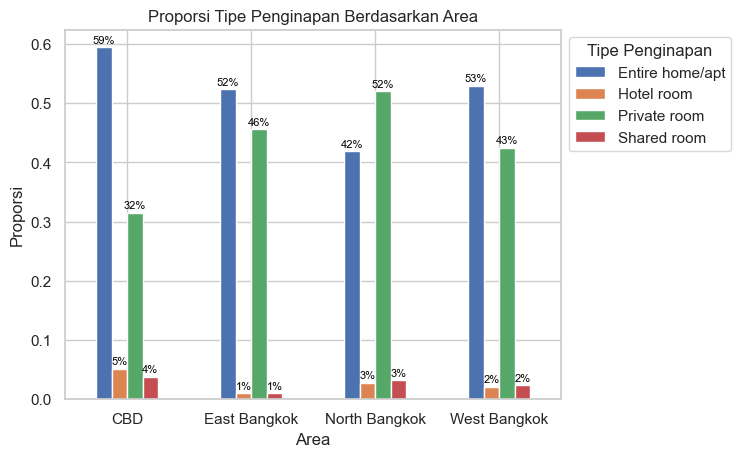

In [74]:
# Create the bar plot
plt.figure(figsize=(6, 10))
sns.set(style="whitegrid")
ax = cross_room_area.plot(kind='bar')

plt.xlabel('Area')
plt.ylabel('Proporsi')
plt.title('Proporsi Tipe Penginapan Berdasarkan Area')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Tipe Penginapan', bbox_to_anchor=(1, 1), loc='upper left')

# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

**Penjelasan**

Grafik menunjukkan bahwa tipe penginapan Entire home/apt mendominasi di area CBD, East Bangkok, dan West Bangkok, masing-masing dengan proporsi lebih dari 50%. Hal ini menunjukkan bahwa banyak host yang lebih memilih untuk menyewakan tipe penginapan entire home/apt, yang cocok bagi wisatawan yang menginginkan privasi dan kenyamanan seperti di rumah sendiri.

Di sisi lain, di area North Bangkok, tipe penginapan Private room memiliki proporsi yang paling tinggi, yaitu sekitar 52%. Hal ini menunjukkan bahwa di daerah tersebut, banyak host yang menawarkan private room dalam rumah mereka untuk disewakan. Tipe akomodasi ini mungkin lebih sesuai dengan lingkungan yang lebih tenang yang jauh dari daerah metropolitan.

In [75]:
# jumlah tipe penginapan per stay type
pd.crosstab(df['room_type'], df['stay_type'])

stay_type,Long Term,Medium Term,Short Term
room_type,,,
Entire home/apt,674,2309,5928
Hotel room,2,12,634
Private room,187,548,5028
Shared room,5,5,513


In [76]:
# kolerasi antara area dan tipe penginapan
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df['room_type'], df['stay_type']))

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

if p_value <= 0.05:
    print("Terdapat hubungan yang signifikan antara 'room_type' dan 'stay_type'.")
else:
    print("Tidak terdapat hubungan yang signifikan antara 'room_type' dan 'stay_type'.")

Chi-square statistic: 1161.444935929609
P-value: 1.0564272844761017e-247
Terdapat hubungan yang signifikan antara 'room_type' dan 'stay_type'.


In [77]:
# proporsi tipe penginapan per stay type
cross_room_stay = pd.crosstab(df['room_type'], df['stay_type']).div(pd.crosstab(df['room_type'], df['stay_type']).sum(axis=1), axis=0)
cross_room_stay

stay_type,Long Term,Medium Term,Short Term
room_type,,,
Entire home/apt,0.075637,0.259118,0.665245
Hotel room,0.003086,0.018519,0.978395
Private room,0.032448,0.095089,0.872462
Shared room,0.009560,0.009560,0.980880


<Figure size 1000x600 with 0 Axes>

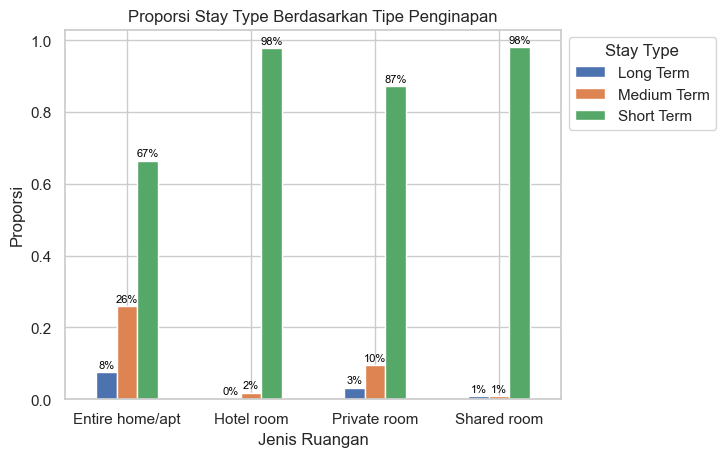

In [78]:
# visualisasi proporsi tipe penginapan per stay type
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = cross_room_stay.plot(kind='bar')

plt.xlabel('Jenis Ruangan')
plt.ylabel('Proporsi')
plt.title('Proporsi Stay Type Berdasarkan Tipe Penginapan')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(title='Stay Type', bbox_to_anchor=(1, 1), loc='upper left')

# Display the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

**Penjelasan**

Grafik yang menunjukkan distribusi durasi minimal menginap untuk berbagai jenis ruangan di Airbnb menunjukkan bahwa mayoritas jenis ruangan menawarkan durasi minimal menginap yang relatif singkat, yaitu kurang dari atau sama dengan 7 malam. Hal ini menunjukkan bahwa sebagian besar host lebih memilih untuk menawarkan penginapan dengan durasi minimal menginap yang relatif singkat.

Jenis ruangan Hotel dan Shared Room memiliki proporsi yang lebih besar untuk durasi menginap singkat, yaitu sekitar 95% keatas dari jenis ruangan yang lain. Sementara itu, tipe penginapan Entire home/apt dan Private room memiliki proporsi yang lebih beragam.

In [79]:
# jumlah reviews berdasarkan room_type
review_room = df.groupby('room_type')['number_of_reviews'].sum().reset_index()
review_room

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Hotel room,12700
2,Private room,50703
3,Shared room,2682


In [80]:
# proporsi reviews berdasarkan room_type
total_reviews_sum = review_room['number_of_reviews'].sum()
review_room['percentage_of_total_reviews'] = (review_room['number_of_reviews'] / total_reviews_sum) * 100
(review_room[['room_type', 'percentage_of_total_reviews']])

,room_type,percentage_of_total_reviews
0,Entire home/apt,74.970458
1,Hotel room,4.810096
2,Private room,19.203645
3,Shared room,1.015801


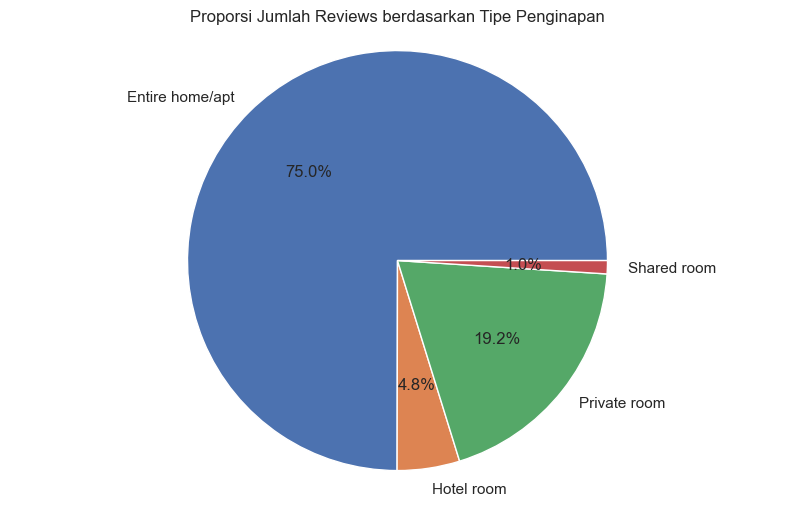

In [81]:
# visualisasi proporsi reviews berdasarkan room_type
reviews_crosstab = pd.crosstab(index=df['room_type'], columns='Total Reviews', values=df['number_of_reviews'], aggfunc='sum')

total_reviews_sum = reviews_crosstab['Total Reviews'].sum()
proportions = (reviews_crosstab['Total Reviews'] / total_reviews_sum) * 100

plt.figure(figsize=(10, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title('Proporsi Jumlah Reviews berdasarkan Tipe Penginapan')
plt.axis('equal')

plt.show()

**Penjelasan**

Analisis diatas menunjukkan bahwa tipe penginapan entire home/apt merupakan tipe penginapan yang paling banyak dipilih dan direview oleh wisatawan. Proporsi review untuk tipe penginapan entire home/apt mencapai 75% dari total review. Faktor yang dapat menjelaskan mengapa tipe penginapan entire home/apt begitu populer di kalangan wisatawa adalah karena tipe penginapan entire home/apt menawarkan privasi dan kenyamanan yang lebih tinggi bagi wisatawan. Wisatawan dapat memiliki ruangan sendiri untuk beristirahat dan beraktivitas, tanpa harus berbagi dengan orang lain. Hal ini penting bagi wisatawan yang ingin merasa seperti di rumah sendiri saat berlibur.

In [82]:
# jumlah reviews berdasarkan stay_type
review_stay = df.groupby('stay_type')['number_of_reviews'].sum().reset_index()
review_stay

,stay_type,number_of_reviews
0,Long Term,7753
1,Medium Term,41684
2,Short Term,214591


In [83]:
# proporsi reviews berdasarkan stay_type
total_reviews_sum = review_stay['number_of_reviews'].sum()
review_stay['percentage_of_total_reviews'] = (review_stay['number_of_reviews'] / total_reviews_sum) * 100
(review_stay[['stay_type', 'percentage_of_total_reviews']])

,stay_type,percentage_of_total_reviews
0,Long Term,2.936431
1,Medium Term,15.787719
2,Short Term,81.275850


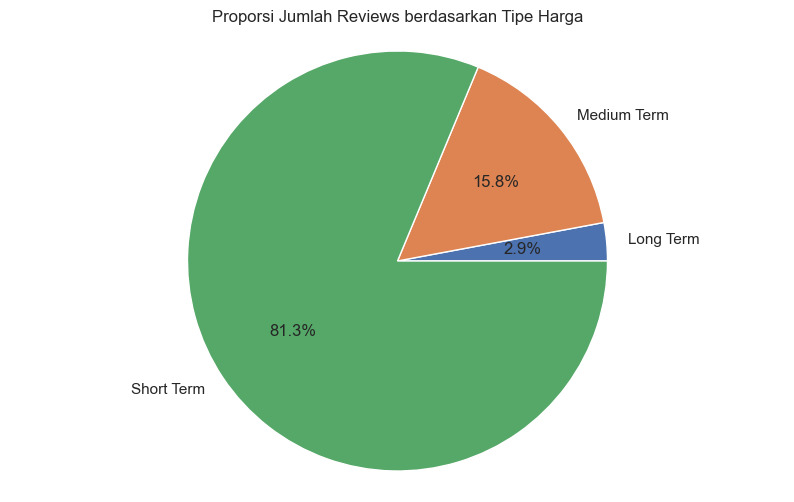

In [84]:
# visualisasi proporsi reviews berdasarkan stay_type
reviews_crosstab = pd.crosstab(index=df['stay_type'], columns='Total Reviews', values=df['number_of_reviews'], aggfunc='sum')

total_reviews_sum = reviews_crosstab['Total Reviews'].sum()
proportions = (reviews_crosstab['Total Reviews'] / total_reviews_sum) * 100

plt.figure(figsize=(10, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title('Proporsi Jumlah Reviews berdasarkan Tipe Harga')
plt.axis('equal')

plt.show()

## **Analisis Harga**

Karena persebaran data price tidak normal, maka median digunakan untuk mengetahui harga per tipe penginapan.

In [85]:
# Median Harga Berdasarkan tipe penginapan
room_median_price = df.groupby('room_type')['price'].median().reset_index().rename(columns={'price':'median_price'}).sort_values(by='median_price',ascending=False)
room_median_price

,room_type,median_price
1,Hotel room,1700.0
0,Entire home/apt,1536.0
2,Private room,1213.0
3,Shared room,500.0


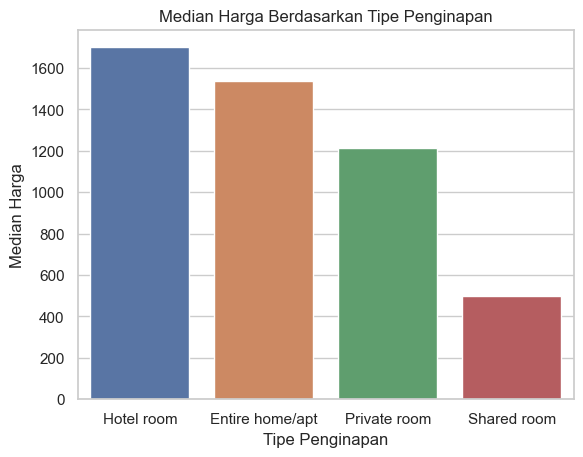

In [86]:
# Visualisasi Median Harga Berdasarkan tipe penginapan
sns.barplot(data=room_median_price, x='room_type', y='median_price')
plt.xlabel('Tipe Penginapan')
plt.ylabel('Median Harga')
plt.title('Median Harga Berdasarkan Tipe Penginapan')
plt.show()

**Penjelasan**

Tipe hotel memiliki median harga yang paling tinggi, diikuti oleh entire home/apartment, private room, dan share room. Hal ini menunjukan bahwa fasilitas yang ditawarkan tipe hotel, membuat hraganya menjadi lebih tinggi disbanding tipe lain. Pada umumnya selain fasilitas, lokasi hotel memiliki lokasi yang yang strategis


In [87]:
# jumlah reviews berdasarkan price type
review_price = df.groupby('price_type')['number_of_reviews'].sum().reset_index()
review_price

,price_type,number_of_reviews
0,Economical,63844
1,Luxury,57962
2,Midrange,142222


In [88]:
total_reviews_sum = review_price['number_of_reviews'].sum()
review_price['percentage_of_total_reviews'] = (review_price['number_of_reviews'] / total_reviews_sum) * 100
(review_price[['price_type', 'percentage_of_total_reviews']])

,price_type,percentage_of_total_reviews
0,Economical,24.180769
1,Luxury,21.952975
2,Midrange,53.866257


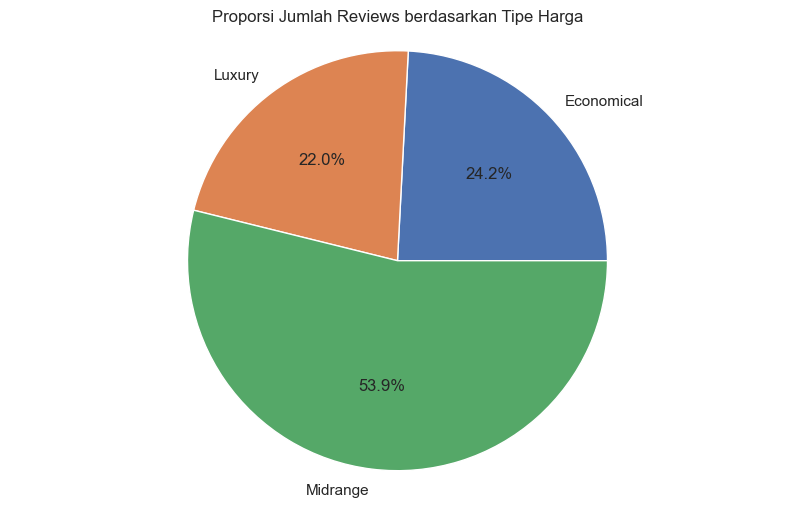

In [89]:
# visualisasi proporsi reviews berdasarkan price_type
reviews_crosstab = pd.crosstab(index=df['price_type'], columns='Total Reviews', values=df['number_of_reviews'], aggfunc='sum')

total_reviews_sum = reviews_crosstab['Total Reviews'].sum()
proportions = (reviews_crosstab['Total Reviews'] / total_reviews_sum) * 100

plt.figure(figsize=(10, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title('Proporsi Jumlah Reviews berdasarkan Tipe Harga')
plt.axis('equal')

plt.show()

**Penjelasan**

Tipe harga Midrange menjadi tipe yang paling diminati guest, dengan proporsi jumlah review sebesar 54%
Hal ini menunjukan bahwa guest bersedia untuk mengeluarkan dana sekitar 900 – 2429-baht untuk sebuah penginapan yang nyaman

# **Conclusion**

* Guest lebih memilih untuk menginap di area metropolitan, seperti area CBD, untuk memulai liburan di Bangkok
* Guest lebih memilih tipe penginapan entire home/apt karena menawarkan privasi dan kenyamanan seperti di rumah sendiri
* Guest lebih memilih tipe penginapan short term karena menawarkan durasi minimal menginap yang singkat
* Guest lebih memilih tipe harga midrange (900 – 2429-baht) karena harga tersebut dirasa terjangkau untuk sebuah penginapan yang nyaman



# **Recommendation**
- Area CBD merupakan area yang paling diminati oleh guest, para host yang memiliki listing di luar area CBD sebaiknya dapat memilih lokasi atau menyediakan fasilitas yang dapat memudahkan akses ke area CBD
- Tipe penginapan yang memberikan privasi dan kenyamanan, seperti tipe penginapan entire home/apt, menjadi yang sering dipilih guest. Para host dapat fokus untuk dapat memberikan aspek privasi dan kenyamanan. - - Tipe penginapan hotel dan private room memiliki potensi untuk menjadi pilihan guest karena secara konsep tipe tersebut dapat memberikan privasi dan kenyamanan
- Berdasarkan pertimbangan area, tipe penginapan, dan layanan, range harga 900 – 2429-baht menjadi range harga yang dirasa wajar bagi guest untuk menginap di Bangkok
- Para host harus memastikan para guest memberi review setelah menginap ditempat mereka, agar para host mendapatkan feedback



# **Tableau**
[Link Story Tableau](https://public.tableau.com/views/Capstone2_AirbnbListingsBangkok/StoryAirbnbListinginBangkok?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)